In [1]:
import numpy as np
import matplotlib.pyplot as plt
import triangle as tr
import matplotlib.lines as mlines

In [2]:
face = tr.get_data('face')
t = tr.triangulate(face, 'p')

C:\Users\saipc\AppData\Local\Temp\ipykernel_8740\276655950.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gnbu_colormap = plt.cm.get_cmap("GnBu")


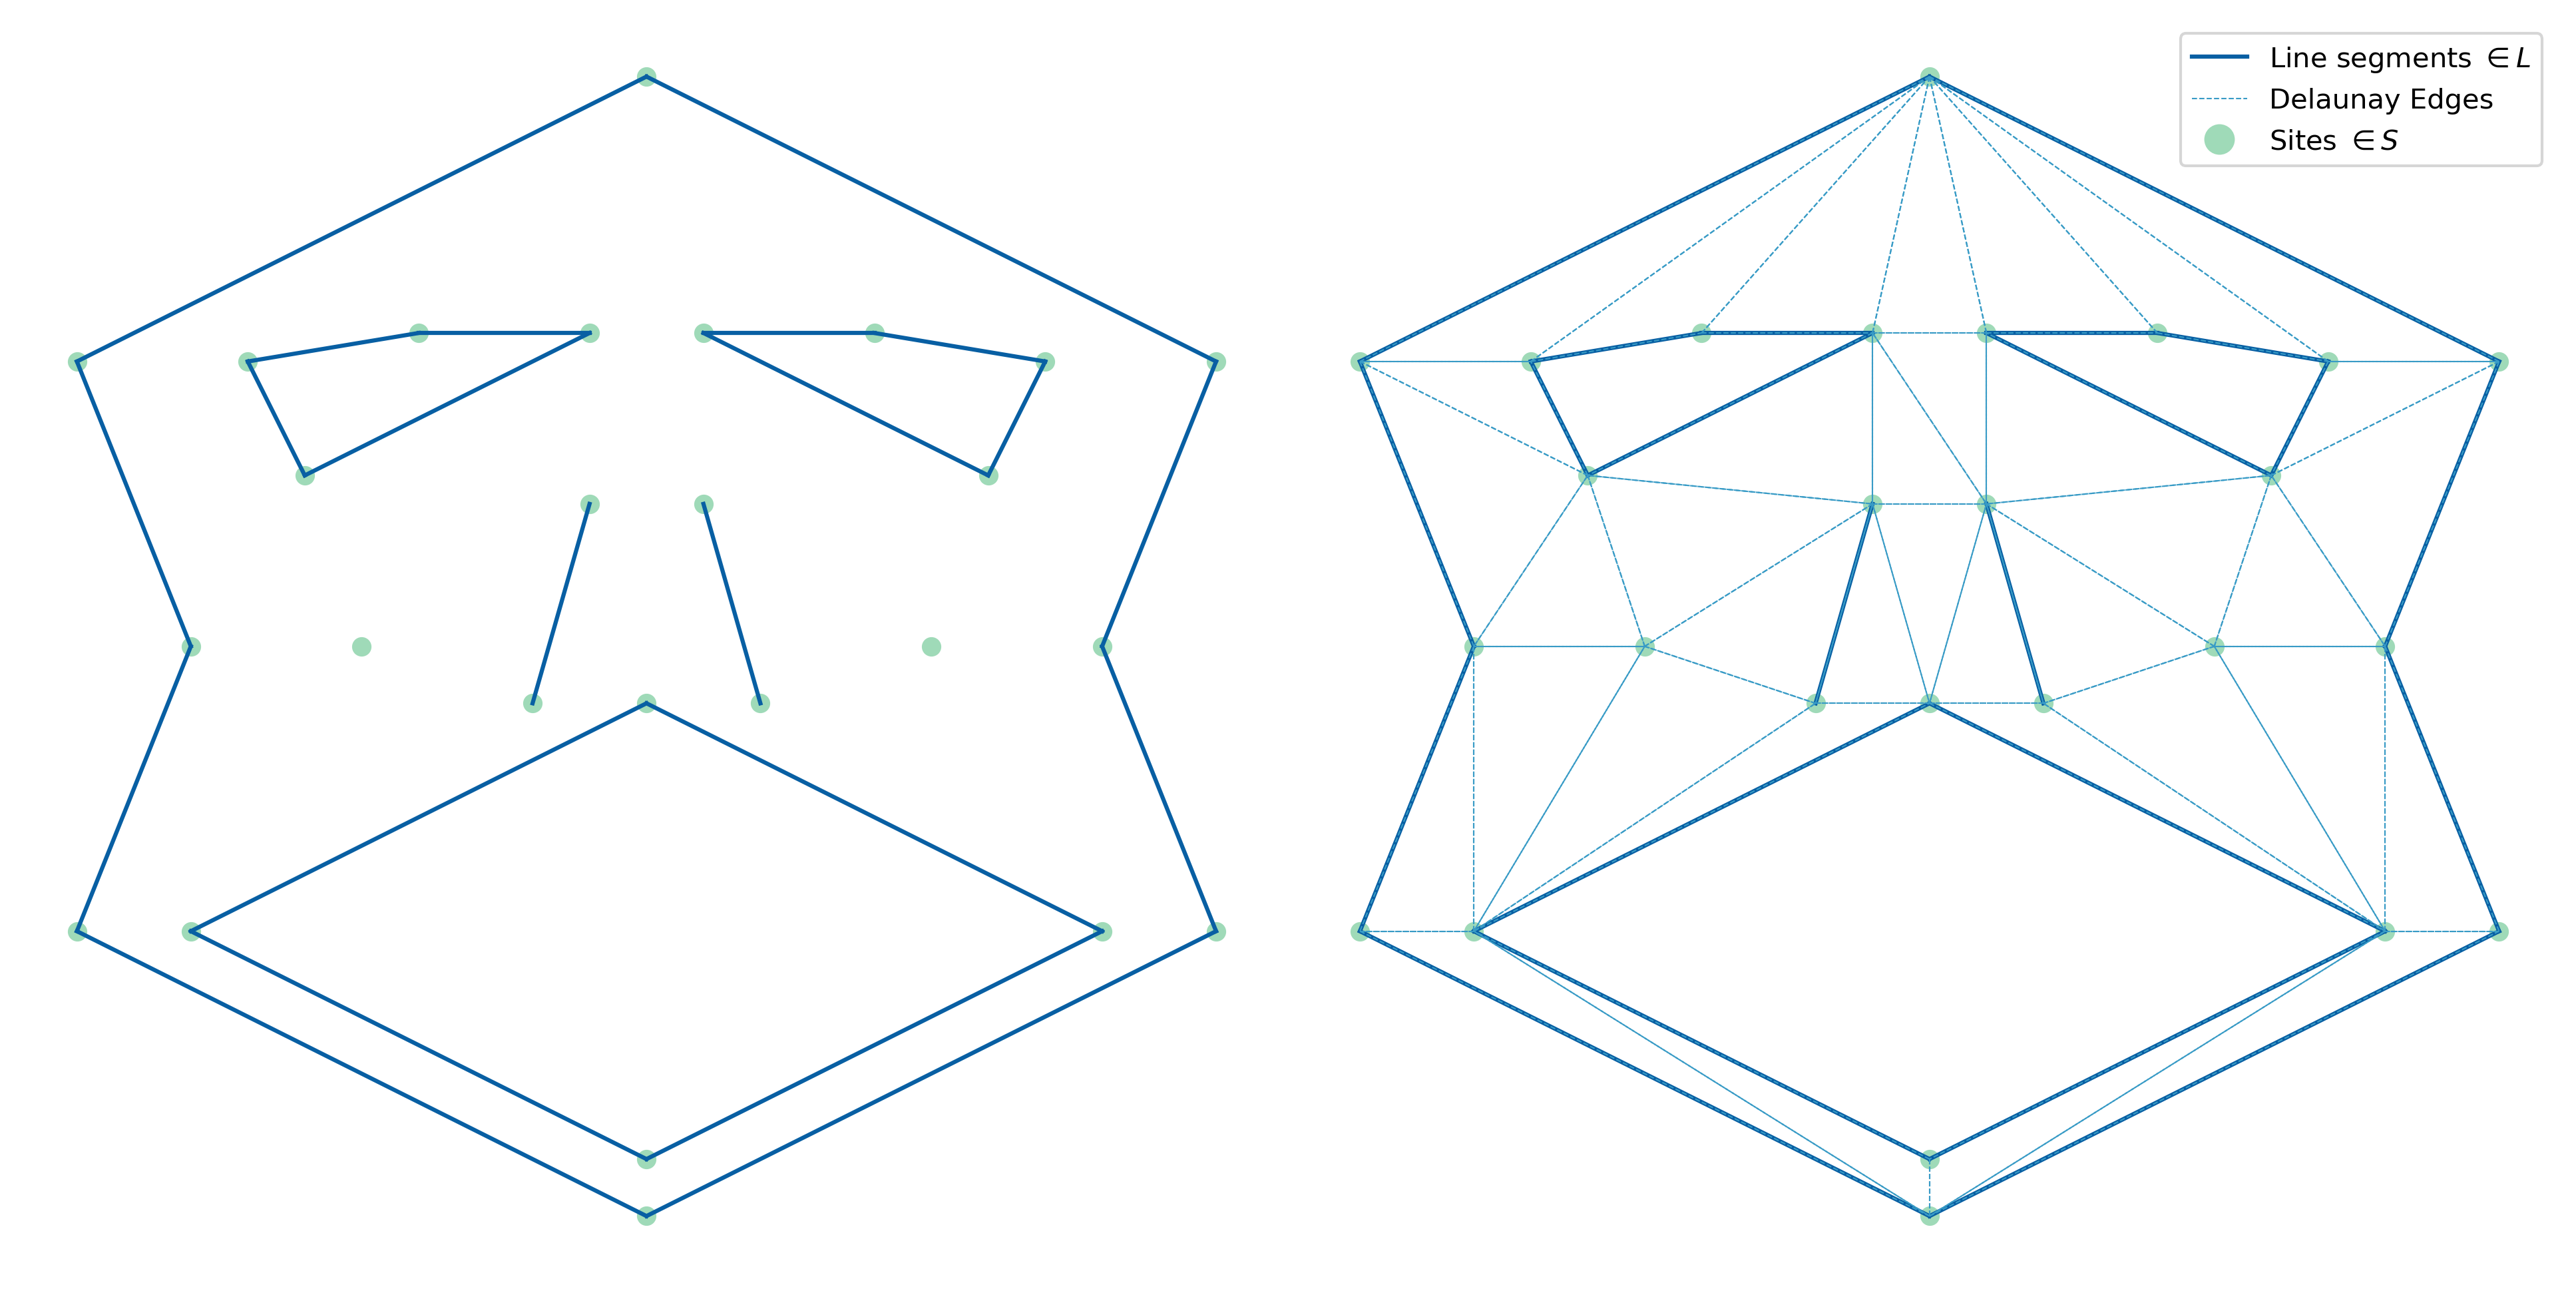

In [14]:
# Generate or load your data for 'face'
face = tr.get_data("face")
t = tr.triangulate(face, "p")

# Define colors from the GnBu colormap
gnbu_colormap = plt.cm.get_cmap("GnBu")
line_seg_color = gnbu_colormap(0.9)
delaunay_edge_color = gnbu_colormap(0.7)
point_color = gnbu_colormap(0.4)

# Start subplots
fig, ax = plt.subplots(1, 2, figsize=(13, 8), dpi=300)  # 1 row, 2 columns

# Left plot (Original face only)
ax[0].set_aspect('equal')
ax[0].axis('off')  # Turn off axis lines and labels
for segment in face["segments"]:
    ax[0].plot(
        face["vertices"][segment, 0],
        face["vertices"][segment, 1],
        color=line_seg_color,
        linestyle="-",
        linewidth=1.5,
    )
ax[0].scatter(
    face["vertices"][:, 0],
    face["vertices"][:, 1],
    color=point_color,
)

# Right plot (Original face with triangulation)
ax[1].set_aspect('equal')
ax[1].axis('off')  # Turn off axis lines and labels
for segment in face["segments"]:
    ax[1].plot(
        face["vertices"][segment, 0],
        face["vertices"][segment, 1],
        color=line_seg_color,
        linestyle="-",
        linewidth=1.5,
    )
for triangle in t["triangles"]:
    for i in range(3):
        start_point = t["vertices"][triangle[i]]
        end_point = t["vertices"][triangle[(i + 1) % 3]]
        ax[1].plot(
            [start_point[0], end_point[0]],
            [start_point[1], end_point[1]],
            color=delaunay_edge_color,
            linestyle="--",
            linewidth=0.5,
        )
ax[1].scatter(
    face["vertices"][:, 0],
    face["vertices"][:, 1],
    color=point_color,
)

# Create custom legend
line_seg_legend = mlines.Line2D(
    [],
    [],
    color=line_seg_color,
    linestyle="-",
    linewidth=1.5,
    label="Line segments $\\in L$",
)
delaunay_edge_legend = mlines.Line2D(
    [],
    [],
    color=delaunay_edge_color,
    linestyle="--",
    linewidth=0.5,
    label="Delaunay Edges",
)
points_legend = mlines.Line2D(
    [],
    [],
    color=point_color,
    marker="o",
    linestyle="None",
    markersize=10,
    label="Sites $\\in S$",
)

# Add the legend to the last plot (or the first, as you prefer)
ax[1].legend(handles=[line_seg_legend, delaunay_edge_legend, points_legend], loc='best')

plt.tight_layout()
plt.show()
